### 4.10 Part5 MLS
#### 1 Importing libraries and df w/o PI
#### 2 analyzing Mature Low Spender by Loyalty Flag
#### 3 -analyzing Mature Low Spender purshease by  sales amount
#### 4 -analyzing Mature Low Spender by Busiest_day
#### Analyzing by prefered hour of day
#### 6 Analyzing number of Mature Low Spender by State
#### 7 Analyzing Mature Low Spenders  by n_dependants
#### 8 Days since prior order
####  9  Defining TOP products for client group


### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

#### -importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','MLS.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag',
       'AgeIncome_flag'],
      dtype='object')

In [5]:
df.shape

(19543086, 31)

In [6]:
df[['user_id','Age', 'income','product_id', 'median_days_sinse_ord','order_number','mean_price']] .describe()

,user_id,Age,income,product_id,median_days_sinse_ord,order_number,mean_price
count,1.954309e+07,1.954309e+07,1.954309e+07,1.954309e+07,1.954309e+07,1.954309e+07,1.954309e+07
mean,1.028124e+05,6.099244e+01,1.135977e+05,2.545479e+04,9.359802e+00,1.781142e+01,7.788966e+00
std,5.938728e+04,1.185586e+01,3.581320e+04,1.417398e+04,6.109826e+00,1.761591e+01,7.094531e-01
min,2.000000e+00,4.100000e+01,2.900100e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.151300e+04,5.100000e+01,9.538400e+04,1.325900e+04,6.000000e+00,5.000000e+00,7.387143e+00
50%,1.021900e+05,6.100000e+01,1.156290e+05,2.513300e+04,7.000000e+00,1.200000e+01,7.818224e+00
75%,1.540850e+05,7.100000e+01,1.423020e+05,3.780000e+04,1.200000e+01,2.500000e+01,8.231280e+00
max,2.062090e+05,8.100000e+01,1.699970e+05,4.968800e+04,3.000000e+01,1.000000e+02,9.998305e+00


### 2 Analyzing Mature Low Spender by Loyalty Flag

#### --creating the subset to avoid Memory Error

In [7]:
df1=df[['user_id','Gender','fam_status','STATE','department_id', 'product_id', 'product_name', 
       'busiest_day','loyalty_flag','AgeIncome_flag','prices','income']]

### - How many customers are MLS?

In [8]:
df1[['user_id']].drop_duplicates().shape

(102032, 1)

### 3 -Analyzing Mature Low Spender by Loyalty Flag and Family Status

#### -creating subset with unique user_id

In [9]:
df1=df[['user_id','fam_status','loyalty_flag']].drop_duplicates()

In [10]:
df1.groupby('fam_status')['loyalty_flag'].value_counts()

fam_status        loyalty_flag    
divorced/widowed  Regular customer     7012
                  New customer         5014
                  Loyal customer       1502
married           Regular customer    39552
                  New customer        28627
                  Loyal customer       8469
single            Regular customer     6027
                  New customer         4470
                  Loyal customer       1359
Name: loyalty_flag, dtype: int64

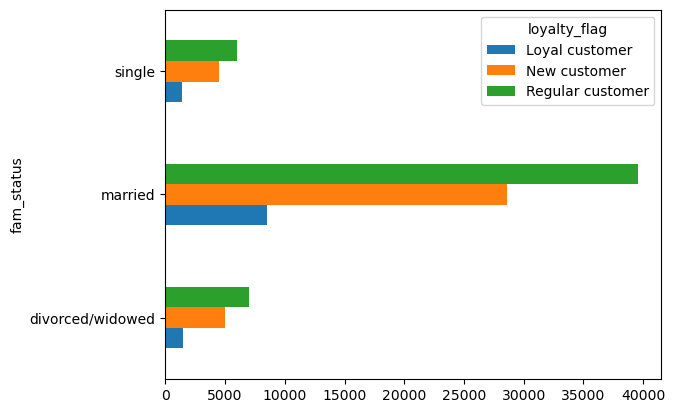

In [11]:
bar12=df1.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [12]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MLS_LoyaltyFlag.png'))

### 3 -analyzing Mature Low Spender purshease by  sales amount

In [13]:
Df1=df[['user_id','prices','loyalty_flag']]

In [14]:
Df1

,user_id,prices,loyalty_flag
0,26711,9.0,New customer
1,26711,12.6,New customer
2,26711,0.0,New customer
3,26711,12.6,New customer
4,26711,12.6,New customer
...,...,...,...
10907397,157930,7.0,New customer
10907398,157930,0.0,New customer
10907402,117766,9.0,New customer
10907403,117766,13.4,New customer


In [15]:
df11=Df1.groupby('loyalty_flag')['prices'].sum()

In [16]:
df11

loyalty_flag
Loyal customer      52177620.3
New customer        19850606.7
Regular customer    79395626.9
Name: prices, dtype: float64

#### -creating and saving plot

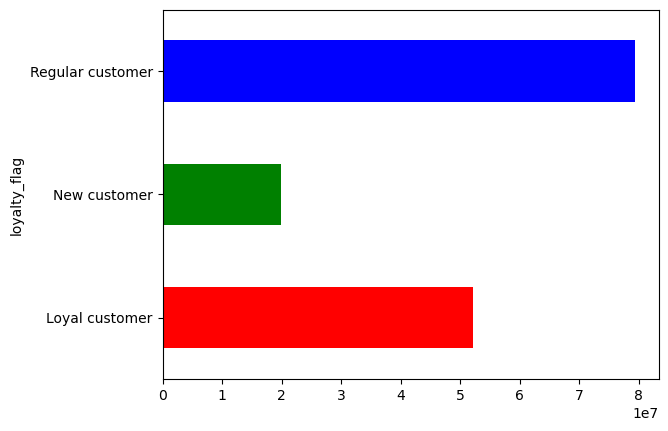

In [17]:
bar22=Df1.groupby('loyalty_flag')['prices'].sum().plot.barh(color=['red', 'green','blue'])

In [18]:
bar22.figure.savefig(os.path.join(path, 'Prepared Data', 'MLS_LoyaltyFlagPrices.png'))

### 4 -analyzing Mature Low Spender by Busiest_day

In [19]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [20]:
df4

,user_id,STATE,busiest_day,day_of_week
0,26711,Missouri,Regularly days,5
1,26711,Missouri,Regularly days,2
2,26711,Missouri,Regularly days,2
3,26711,Missouri,Busiest days,1
4,26711,Missouri,Regularly days,5
...,...,...,...,...
10907397,157930,Massachusetts,Slowest days,3
10907398,157930,Massachusetts,Regularly days,6
10907402,117766,Connecticut,Busiest days,1
10907403,117766,Connecticut,Regularly days,5


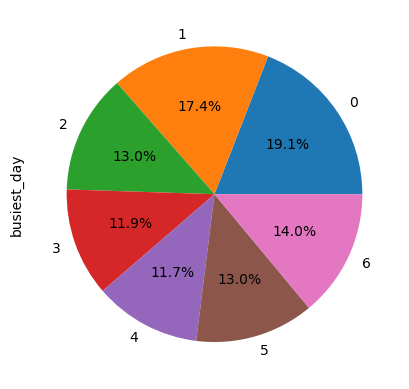

In [21]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [22]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'MLS_BusiestDayOfWeek.png'))

In [23]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    3732534
1    3392793
2    2545702
3    2318597
4    2282162
5    2542498
6    2728800
Name: busiest_day, dtype: int64

### 5 Analyzing by prefered hour of day

In [24]:
df44=df[['order_hour_of_day','user_id']]

In [25]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      129292
1       68057
2       39971
3       30104
4       31594
5       53168
6      174008
7      545783
8     1053124
9     1491635
10    1667377
11    1644697
12    1574804
13    1601916
14    1619956
15    1592655
16    1523757
17    1255397
18     986068
19     757927
20     590539
21     483849
22     381727
23     245681
Name: user_id, dtype: int64

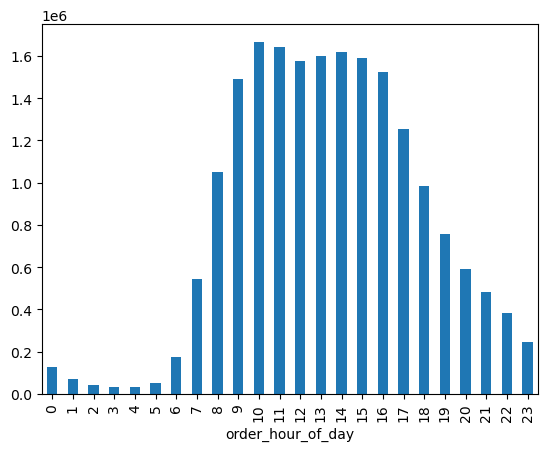

In [26]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [27]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'MLS_BusiestHourOfDay.png'))

### 6 Analyzing number of Mature Low Spender by State

In [28]:
df5=df[['user_id','STATE']]

In [29]:
DF5=df5.drop_duplicates().reset_index()

In [30]:
DF5

,index,user_id,STATE
0,0,26711,Missouri
1,144,133128,Kentucky
2,226,69965,Texas
3,317,33835,Nebraska
4,357,75032,Georgia
...,...,...,...
102027,10898951,109272,Ohio
102028,10898988,82612,Tennessee
102029,10899442,181214,Georgia
102030,10900939,48223,North Carolina


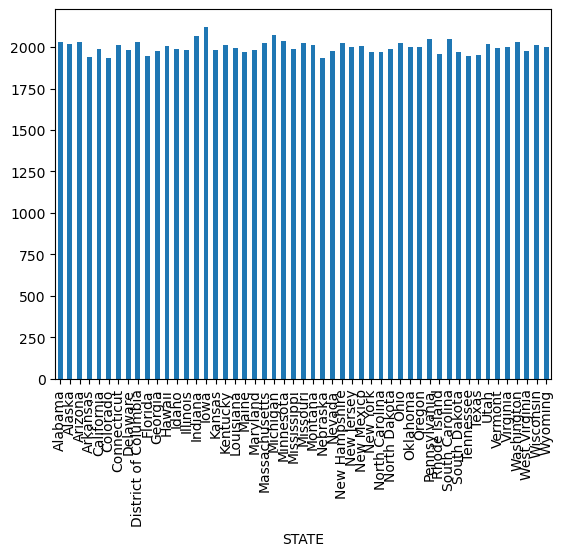

In [31]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [32]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 2031
Alaska                  2017
Arizona                 2031
Arkansas                1940
California              1986
Colorado                1937
Connecticut             2011
Delaware                1985
District of Columbia    2028
Florida                 1948
Georgia                 1979
Hawaii                  2006
Idaho                   1988
Illinois                1985
Indiana                 2067
Iowa                    2123
Kansas                  1985
Kentucky                2015
Louisiana               1995
Maine                   1968
Maryland                1983
Massachusetts           2022
Michigan                2073
Minnesota               2038
Mississippi             1989
Missouri                2023
Montana                 2012
Nebraska                1932
Nevada                  1978
New Hampshire           2024
New Jersey              2003
New Mexico              2007
New York                1970
North Carolina          1972
North Da

In [33]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'MLS_UsersNumberState.png'))

### 7 Analyzing Mature Low Spenders  by n_dependants

In [34]:
df6=df[['user_id', 'n_dependants']]

In [35]:
DF6=df6.drop_duplicates()

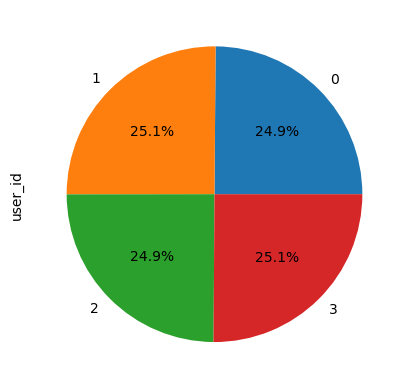

In [36]:
pie16=df6.groupby(['n_dependants'])['user_id'].nunique().plot(kind='pie', autopct='%0.01f%%')

In [37]:
df6

,user_id,n_dependants
0,26711,3
1,26711,3
2,26711,3
3,26711,3
4,26711,3
...,...,...
10907397,157930,0
10907398,157930,0
10907402,117766,0
10907403,117766,0


In [38]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'MLS_NDependansUsers.png'))

In [39]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    25384
1    25650
2    25385
3    25613
Name: user_id, dtype: int64

### 8 Days since prior order

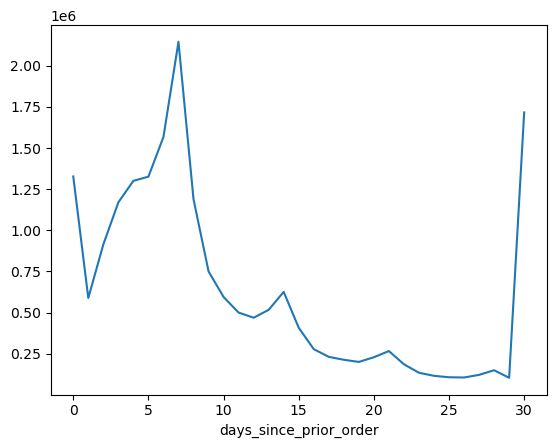

In [40]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [41]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     1326605
1      588415
2      913710
3     1169466
4     1300107
5     1325668
6     1566340
7     2144854
8     1188597
9      750253
10     594658
11     499900
12     468625
13     516450
14     625686
15     407744
16     277754
17     230964
18     213191
19     200070
20     228691
21     266071
22     185840
23     134270
24     115724
25     107045
26     105540
27     121506
28     149669
29     103800
30    1715873
Name: days_since_prior_order, dtype: int64

In [42]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'MLS_DaysSincePriorOrder.png'))

### 9  Defining TOP products for client group


 #### creating subset

In [43]:
df18=df[['product_name','product_id','prices']]

In [44]:
df18

,product_name,product_id,prices
0,Soda,196,9.0
1,0% Greek Strained Yogurt,38928,12.6
2,,0,0.0
3,0% Greek Strained Yogurt,38928,12.6
4,0% Greek Strained Yogurt,38928,12.6
...,...,...,...
10907397,Plain Bagels,20738,7.0
10907398,,0,0.0
10907402,Soda,196,9.0
10907403,Zero Calorie Cola,46149,13.4


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [45]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().drop(index=2).head(10)

In [46]:
DF18

,product_name,prices
0,Banana,283893
1,Bag of Organic Bananas,231704
3,Organic Baby Spinach,147147
4,Organic Hass Avocado,132255
5,,120232
6,Organic Avocado,105661
7,Large Lemon,91164
8,Strawberries,86580
9,Limes,84623
10,Organic Whole Milk,83975


In [47]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [48]:
DF18

,product_name,count_orders
0,Banana,283893
1,Bag of Organic Bananas,231704
3,Organic Baby Spinach,147147
4,Organic Hass Avocado,132255
5,,120232
6,Organic Avocado,105661
7,Large Lemon,91164
8,Strawberries,86580
9,Limes,84623
10,Organic Whole Milk,83975


#### -creating plot

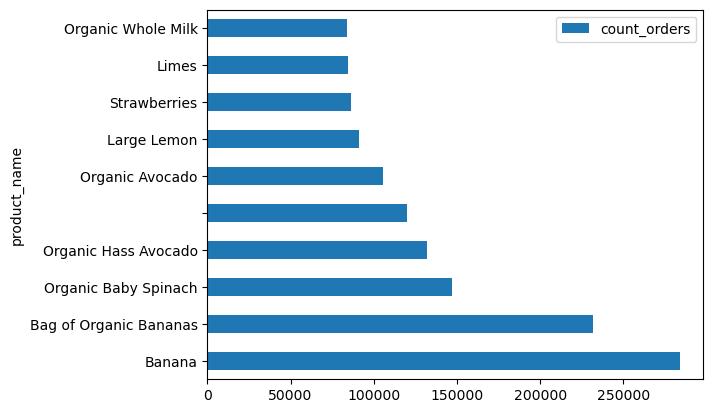

In [49]:
Bar21=DF18.plot.barh(x='product_name')

In [50]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'MLS_Products.png'))

#### droping duplicates

In [51]:
df19=df18.drop_duplicates()

In [52]:
df19

,product_name,product_id,prices
0,Soda,196,9.0
1,0% Greek Strained Yogurt,38928,12.6
2,,0,0.0
5,Clementines,6184,4.3
6,Assorted Nuggets,8617,4.0
...,...,...,...
10809894,Organic Baked Sour Cream & Onion Potato Chips,17885,3.0
10841690,Vegan Potato,44569,6.7
10876919,Dry Roasted Goji Blend Edamame,45897,2.1
10879578,Go Bar Chocolate Brownie,45602,2.5


#### sorting by descending order to see TOP products

In [53]:
df19.loc[df19['prices']>=1000].sort_values(by='prices', ascending=False).head(10)

,product_name,product_id,prices
